# #4: Research Findings & Conclusions

Findings from the data will be discussed here:


- Word Importances
    - Word importances of the Lamborghini dataset & Interests of Lamborghini Enthusiasts
    - Word Importances of the Tesla dataset & Interests of Tesla enthusiasts
- Management Report
- Further Steps

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn.linear_model import LogisticRegression

import gensim
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.metrics import confusion_matrix, recall_score, precision_score

import warnings
warnings.simplefilter("ignore")

In [2]:
additional = ["lamborghini", "lambo", "tesla", "teslas", "elon", "musk", "www", "com", "http", "like", "just", "want", "use", "got", "know",
             "support", "thread", "question", "answer", "deleted", "jpg", "reddit", "redd", "ve", "get", "go", "going",
             "post", "pdf", "jpeg", "png", "default", "amp", "way", "car", "cars", "files", "poll", "vote", "see", "day",
             "please", "help", "make", "made", "look", "long", "time", "still", "don", "take", "from", "back", "wiki", "subreddit",
             "live", "chat", "new", "ive", "really", "need", "dont", "im", "looking", "getting", 
             "easily", "share", "reach", "welcoming", "today", "time", "think", "day", "saw", "just",
             "people", "year", "video", "work", "good", "price", "better", "vs", "buy", "week", "best", "years", "guys", "took",
             "aventador", "huracan", "urus", "performante", "gallardo", "countach", "diablo", "centenario"]
#look for most common stop words in the english language


sw = STOPWORDS.union(additional)
print(len(sw))

418


In [3]:
combined = pd.read_csv("data/combined_stemmed.csv")

x = combined["stemmed"]
y = combined["y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,
                                                    stratify = y,
                                                    random_state = 42)

## 5.1: Word Importances

Using the best performing model, the importance of various words are ranked using the Logistic Regression coefficients and evaluated. The coefficients from the Logistic Regression model are exponentiated.

In [4]:
tvec = TfidfVectorizer(stop_words = sw, ngram_range = (1,2))
logreg = LogisticRegression(C = 10, max_iter = 20, penalty = "l2", random_state = 42, solver = "liblinear")
x_train_tvec = tvec.fit_transform(x_train)
x_test_tvec = tvec.transform(x_test)

logreg.fit(x_train_tvec, y_train)

LogisticRegression(C=10, max_iter=20, random_state=42, solver='liblinear')

In [5]:
features_df = pd.DataFrame(tvec.get_feature_names(), columns = ["Features"])

#expoentiate the coefficients

coef_df = pd.DataFrame(logreg.coef_[0], columns = ["Coefficients"])
exp_df = pd.DataFrame(np.exp(logreg.coef_[0]), columns = ["Exponentiated Coefficients"])
final = pd.concat([features_df, coef_df, exp_df], axis = 1)

In [6]:
def bar_plotter(df, n, col, head = "head"):
    df = df.sort_values(by = col, ascending = False)
    
    if head == "head":
    
        df = df.head(n)
        
    elif head == "tail":
        df = df.tail(n)
        
    plt.figure(figsize = (40,40))
    bar = sns.catplot(x = "Exponentiated Coefficients",
                  y = "Features",
                  data = df,
                  kind = 'bar',
                  height = 8,
                  aspect = 2)    
    plt.title('Coefficients of Features on Logistic Regression', fontsize = 24)
    plt.xlabel("Coefficients", size = 20)
    plt.ylabel("Features", size = 15)
    plt.show()

### 5.1.1: Word importance of the Lamborghini dataset & Interests of Lamborghini Enthusiasts

<Figure size 2880x2880 with 0 Axes>

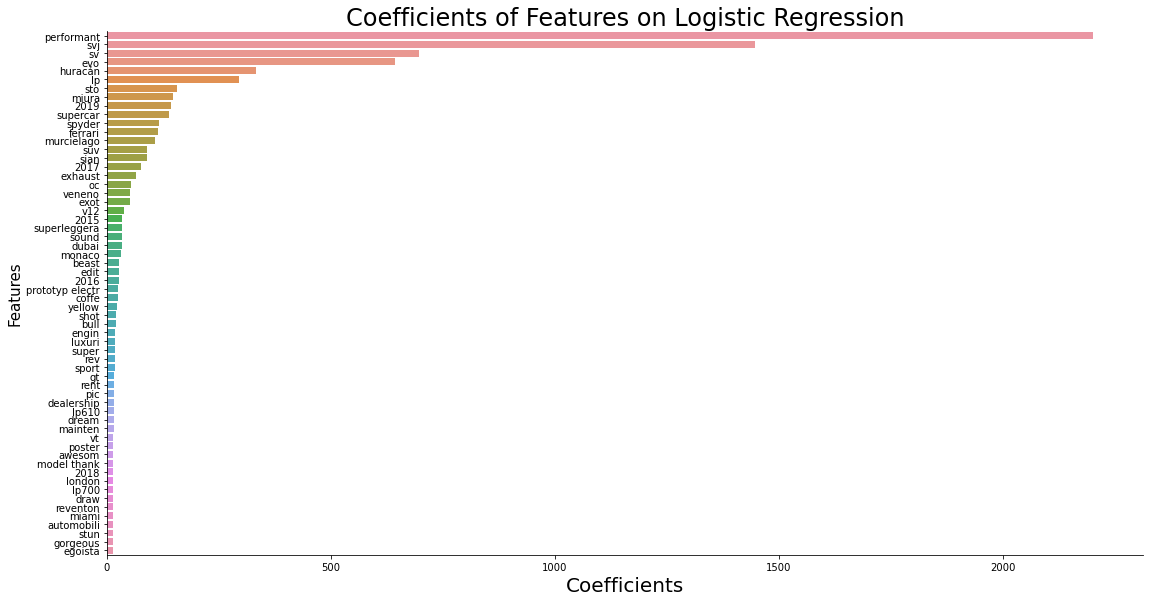

In [7]:
bar_plotter(final, 60, "Exponentiated Coefficients")

In [10]:
final = final.sort_values(by = "Coefficients", ascending = False)
pd.set_option("display.max_rows", None)
final.head(100)

,Features,Coefficients,Exponentiated Coefficients
51770,performant,7.697439,2202.699037
69581,svj,7.277395,1447.212739
69521,sv,6.545275,695.948022
25330,evo,6.465907,642.847351
34432,huracán,5.808318,333.058450
41441,lp,5.688662,295.497940
67656,sto,5.055679,156.911049
44324,miura,4.993302,147.422352
829,2019,4.970631,144.117844
68914,supercar,4.931605,138.601851


Mention of the following words makes a user x times more likely to be a Lamborghini enthusiast:

- Dubai: 32.53x
- Monaco: 31.49x
- Beast: 27.85x
- Coffee: 24.28x
- London: 13.03x
- Fastest: 11.6x
- Mclaren: 9.63x
- Race: 4.65x
- Beach: 3.23x


All of these show that Lamborghini users are more likely to have the following interests than Tesla users:
- Liking adrenaline sports such as car racing makes one at least 4.65x times more likely to be a Lamborghini enthusiast
- Liking coffee makes one 24.28x more likely to be a Lamborghini enthusiast
- Enjoyment of the beach makes one 3.23x more likely to be a Lamborghini enthusiast.

The word "Tractor" was amongst the top 100 most important features, which was unexpected, but looking at the history of Lamborghini, Ferrucio Lamborghini (the founder of Lamborghini) was the owner of a tractor company who experienced discrimination from Enzo Ferrari because of his humble background. The Lamborghini brand therefore represents the resolve of someone who overcame adversity to achieve financial success.

### 5.1.2: Word Importance of the Tesla dataset & Interests of Tesla enthusiasts

<Figure size 2880x2880 with 0 Axes>

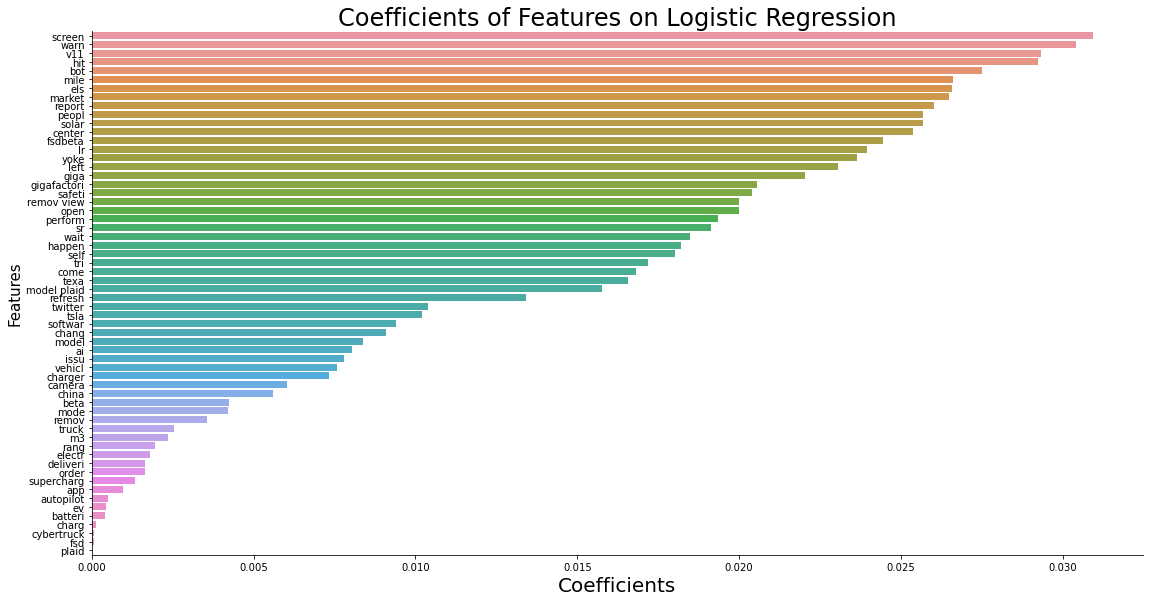

In [8]:
bar_plotter(final, 60, "Exponentiated Coefficients", "tail")

In [9]:
#visualize the top 100 words

final = final.sort_values(by = "Coefficients", ascending = False)
pd.set_option("display.max_rows", None)
final.tail(100)

,Features,Coefficients,Exponentiated Coefficients
10652,brake,-2.864844,0.056992
24180,energi,-2.880487,0.056107
72331,tow,-2.924328,0.053701
76431,vision,-2.929458,0.053426
78424,window,-2.932805,0.053247
9073,befor,-2.940187,0.052856
48172,offer,-2.973093,0.051145
65274,someon,-2.975164,0.051039
71161,thing beauti,-2.982018,0.050690
32258,happi halloween,-2.983688,0.050606


The word usage by Tesla brand enthusiasts are instead extremely different:

- Robot: 0.04998x
- Stock: 0.0496x
- Biden: 0.0346x
- Bitcoin: 0.0326x
- Solar: 0.0257x
- AI: 0.00803x
- Autopilot: 0.000501x

Other words which do not seem very informative, but appear frequently include:
- Screen

All of these show that Lamborghini clientele are less likely to have these interests compared to Tesla clientele (the lower, the more predictive of Tesla ownership):
- Cryptocurrencies: 0.0326x more likely
- Artificial Intelligence: 0.00803x more likely
- Stock market trading and investments: At least 0.0496x more likely
- Autonomous vehicles/self-driving cars: At least 0.000501x more likely
- Clean energy and environmental conservation: At least 0.0257x more likely
- Political progressiveness: 0.0346x more likely

### NLP Results vs EDA Expectations 

For Tesla: cryptocurrencies such as Dogecoin and Bitcoin were NOT listed as the top occurring words during EDA, however, they had a very high probablity of predicting that one is a Tesla enthusiast.

For Lamborghini: In contrast, words related to NFL & American Football were frequently listed as the top occuring words during EDA, however, they were NOT important in predicting an individual as a Lamborghini enthusiast.

## Management Report

Through NLP analysis, a myriad of words which are pivotal in the classification and predicting task have been isolated. These words reveal promising differences between Tesla and Lamborghini users, in terms of passions/hobbies, personality type, and political leaning.

### Occupation 

There does not seem to be any discussion related to occupation on the threads, and further investigation is required on this frontier.

### Passions/Hobbies  

As discussed above, holding all things constant:

Lamborghini clientele are more likely to have the following interests than Tesla clientele:
- Coffee: 23.59x
- Adrenaline sports: 4.65x
- Beach: 3.23x

Lamborghini clientele are less likely to have the following interests than Tesla clientele:
- Cryptocurrencies: an interest in cryptocurrencies means that an individual is 2.79x to 3.84x more likely to gravitate towards the Tesla brand)
- Artificial Intelligence: 0.0145x more likely
- Stock market trading and investments: At least 0.0628x more likely
- Autonomous vehicles/self-driving cars: At least 0.000150x more likely
- Clean energy and environmental conservation: At least 0.0407x more likely
- Political progressiveness: 0.056x more likely

### Extroversion is a Predictor of Lamborghini ownership, whlie Openness is a Predictor of Tesla Ownership

- Extroversion is likely to be a predictor of Lamborghini ownership. According to the Big 5 Model of Personality, there are several aspects of extroversion, including gregariousness (liking to be in large crowds) and a preference for an exciting and fast-paced lifestyle. Interests like going to the beach and adrenaline sports (eg. race car driving) strongly correlate with extroversion.


- A High Openness to Experience is likely to be a predictor of Tesla ownership. According to the Big 5 Model of Personality, individuals with a high Openness to experience are intellectual, innovative, and likely to be interested in science, technology and culture (eg. fine arts). The topics discussed by Tesla owners, such as artificial intelligence, cryptocurrencies, clean energy and technology stocks seem to correlate with the topics discussed by other individuals who are high in this trait.



NOTE: This does not mean that Tesla owners are introverts or that Lamborghini owners are conservative.
This means that one's level of extroversion is a predictor of one's proclivity towards purchasing a Lamborghini, but one's level of Openness is largely irrelevant.
On the other hand, one's level of Openness is a predictor of one's proclivity towards purchasing a Tesla, but one's level of extroversion is largely irrelevant.

### Tesla owners are politically progressive, Lamborghini owners are not partisan

- Lamborghini owners do not appear to be partisan.

- Tesla owners are more likely to be politically progressive, especially evidenced by the strong interest in clean energy and environmental conservation. The word Biden is also a top predictor of Tesla ownership.

# Further Steps

1. Investigate whether BERT or GPT-3 can improve model performance
2. False positives/false negatives investigations
3. Word2Vec relationships
4. VADER sentiment analysis
5. This dataset and its insights can be shared with executives and branding/marketing experts that are working for both brands.